# PCA

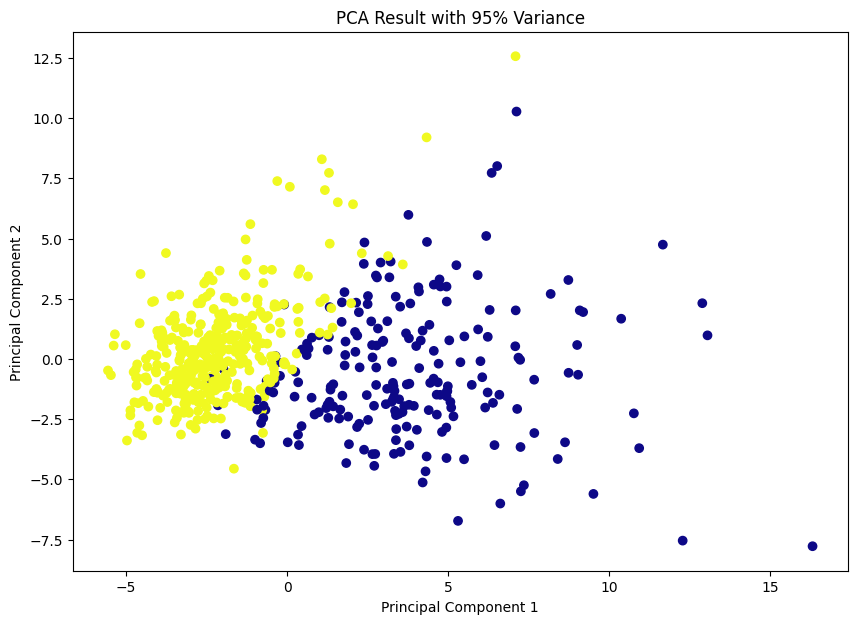

In [24]:
# import all the files needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dataset = load_breast_cancer()
data = dataset['data']
features = dataset['feature_names'] # features of the data
target = dataset['target']
X = pd.DataFrame(data, columns = features)

# standardize the data
scaler = StandardScaler()

scaled_data = scaler.fit_transform(X)

# PCA

# pca = PCA(n_components= 3) # with 3 principal components
pca = PCA(n_components= 0.95) # preserve 95% variability of the data
# pca.fit(scaled_data)
x = pca.fit_transform(scaled_data)
# pca.components_

# plot the PC
plt.figure(figsize = (10,7))
plt.scatter(x[:,0],x[:,1],cmap = 'plasma',c = target) # c=target assigns colors based on the target labels.
# The cmap='plasma' argument specifies the colormap to use for coloring the points.

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result with 95% Variance')
plt.show()

In [25]:
# Get the number of components chosen by PCA
num_components = pca.n_components_
print(f'Number of components to preserve 95% variance: {num_components}')


Number of components to preserve 95% variance: 10


# Pipeline


In [14]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# load data set
iris_data = load_iris()
X = iris_data['data']
y = iris_data['target']

# Test train split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

#pipeline
pipe_DT = Pipeline([('pca',PCA(n_components = 2)),('std',StandardScaler()), ('model',DecisionTreeClassifier())],verbose = True)
pipe_DT.fit(X_train, y_train)
y_pred = pipe_DT.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy
pipe_DT.named_steps['model']
pipe_DT.get_params()

[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=   0.0s


{'memory': None,
 'steps': [('pca', PCA(n_components=2)),
  ('std', StandardScaler()),
  ('model', DecisionTreeClassifier())],
 'verbose': True,
 'pca': PCA(n_components=2),
 'std': StandardScaler(),
 'model': DecisionTreeClassifier(),
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 2,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'std__copy': True,
 'std__with_mean': True,
 'std__with_std': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__random_state': None,
 'model__splitter': 'best'}